In [2]:
#importing Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import dateutil

In [3]:
ReadTexasDF = pd.read_csv("Resources/TexasCases.csv")
ReadTexasDF = ReadTexasDF.drop(['Unnamed: 10', 'Unnamed: 11'], axis=1)

ReadTexasDF.head()

,Last_Update,Province_State,MonthNumber,Month,Confirmed,Deaths,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate
0,10/31/21,Texas,10,Oct,4238040,71139,14616.00701,35037674,1.678583,120836.7285
1,10/30/21,Texas,10,Oct,4234996,71075,14605.50897,34970229,1.678278,120604.1265
2,10/29/21,Texas,10,Oct,4231141,70886,14592.21398,34902172,1.675340,120369.4138
3,10/28/21,Texas,10,Oct,4224781,70718,14570.27983,34847397,1.673886,120180.5077
4,10/27/21,Texas,10,Oct,4221302,70486,14558.28157,34777776,1.669769,119940.4012


In [4]:
#ReadTexasDF['Last_Update'] = ReadTexasDF['Last_Update'].apply(dateutil.parser.parse, dayfirst=True)
GroupbyMonth = ReadTexasDF.groupby(["Month","MonthNumber"])



NumberOfItems = GroupbyMonth["Province_State"].count()

SumOfConformedCases = round((GroupbyMonth["Confirmed"].sum()/NumberOfItems))
SumOfDeaths = round(GroupbyMonth["Deaths"].sum()/NumberOfItems)
IncidentRates = round((GroupbyMonth["Incident_Rate"].sum()/NumberOfItems),2)
CaseFatalityRatio = round((GroupbyMonth["Case_Fatality_Ratio"].sum()/NumberOfItems),2)
TestingRate = round((GroupbyMonth["Testing_Rate"].sum()/NumberOfItems),2)

TexasStateSummaryDF = pd.DataFrame({"NumberOfItems": NumberOfItems,
                                   "SumOfConformedCases": SumOfConformedCases,
                                   "SumOfDeaths":SumOfDeaths,
                                   "IncidentRates":IncidentRates,
                                   "CaseFatalityRatio":CaseFatalityRatio,
                                   "TestingRate":TestingRate})

TexasStateSummaryDF= TexasStateSummaryDF.sort_values(by=['MonthNumber'])
TexasStateSummaryDF

,,NumberOfItems,SumOfConformedCases,SumOfDeaths,IncidentRates,CaseFatalityRatio,TestingRate
Month,MonthNumber,,,,,,
Jan,1,12,2265296.0,35061.0,7812.48,1.55,57190.02
Feb,2,28,2544373.0,40665.0,8772.22,1.60,64098.95
March,3,31,2729215.0,46395.0,9412.42,1.70,70171.29
April,4,30,2840755.0,49352.0,9797.10,1.74,76237.30
May,5,31,2926735.0,50894.0,10093.62,1.74,81988.93
Jun,6,30,2977503.0,51951.0,10269.43,1.74,86268.18
July,7,31,3042092.0,52762.0,10491.46,1.73,89991.78
Aug,8,31,3356635.0,54604.0,11576.25,1.63,96994.00
Sept,9,30,3861180.0,60868.0,13316.31,1.58,107895.15


In [5]:
#plt.plot(TexasStateSummaryDF["MonthNumber"],TexasStateSummaryDF["SumOfConformedCases"])
TexasStateSummaryDF.dtypes

NumberOfItems            int64
SumOfConformedCases    float64
SumOfDeaths            float64
IncidentRates          float64
CaseFatalityRatio      float64
TestingRate            float64
dtype: object

In [6]:
TexasStateSummaryDF.to_csv("TexasCasesOutput.csv")

In [7]:

ReadingOutputDF = pd.read_csv("TexasCasesOutput.csv")
ReadingOutputDF

,Month,MonthNumber,NumberOfItems,SumOfConformedCases,SumOfDeaths,IncidentRates,CaseFatalityRatio,TestingRate
0,Jan,1,12,2265296.0,35061.0,7812.48,1.55,57190.02
1,Feb,2,28,2544373.0,40665.0,8772.22,1.60,64098.95
2,March,3,31,2729215.0,46395.0,9412.42,1.70,70171.29
3,April,4,30,2840755.0,49352.0,9797.10,1.74,76237.30
4,May,5,31,2926735.0,50894.0,10093.62,1.74,81988.93
5,Jun,6,30,2977503.0,51951.0,10269.43,1.74,86268.18
6,July,7,31,3042092.0,52762.0,10491.46,1.73,89991.78
7,Aug,8,31,3356635.0,54604.0,11576.25,1.63,96994.00
8,Sept,9,30,3861180.0,60868.0,13316.31,1.58,107895.15
9,Oct,10,31,4162857.0,68380.0,14356.57,1.64,117209.98


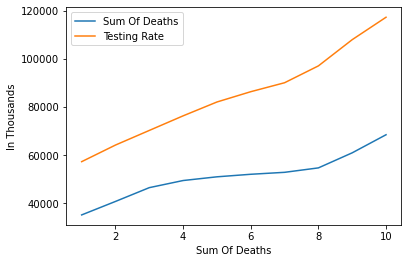

In [15]:
#Ploting bitween Sum of Deaths vs Testing Rate.
plt.plot(ReadingOutputDF["MonthNumber"],ReadingOutputDF["SumOfDeaths"],label='Sum Of Deaths')
plt.plot(ReadingOutputDF["MonthNumber"],ReadingOutputDF["TestingRate"], label='Testing Rate')
plt.xlabel('Sum Of Deaths')
plt.ylabel('In Thousands')
plt.legend()
plt.show()
plt.show()

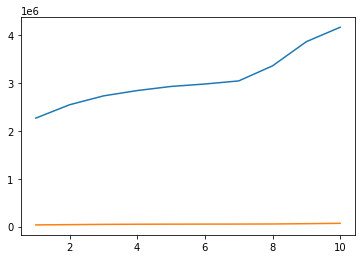

In [10]:
#Ploting Sum of Conformed Cases.
plt.plot(ReadingOutputDF["MonthNumber"],ReadingOutputDF["SumOfConformedCases"])
plt.plot(ReadingOutputDF["MonthNumber"],ReadingOutputDF["SumOfDeaths"])
plt.show()